In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [3]:
data = pd.read_excel("iris_data.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking for Null Values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Summary
7 missing values in sepel length
6 missing values in sepel width
6 missing values in petal length

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

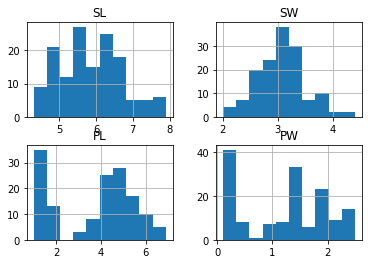

In [7]:
data.hist()

In [8]:
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].median())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Detecting outlier values and processing it

Text(0.5, 1.0, 'Box plot of dataset')

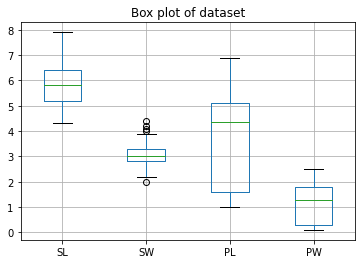

In [10]:
data.boxplot()
plt.title('Box plot of dataset')

In [11]:
# Outlier detected in SW.

In [12]:
df_data = data.groupby("Classification")


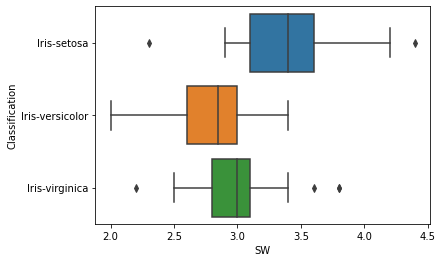

In [13]:
sns.boxplot(data=data,y="Classification",x="SW")
plt.show()

In [14]:
import scipy.stats as stats

In [15]:
Q1=df_data.get_group("Iris-setosa")["SW"].quantile(q=.25)
Q2=df_data.get_group("Iris-setosa")["SW"].quantile(q=.5)
Q3=df_data.get_group("Iris-setosa")["SW"].quantile(q=.75)
IQR= Q3-Q1

low_data= Q1-(1.5*IQR)
high_data = Q3+(1.5*IQR)

data.loc[(data["Classification"]=="Iris-setosa")&(data["SW"]<low_data),"SW"]=Q1
data.loc[(data["Classification"]=="Iris-setosa")&(data["SW"]>high_data),"SW"]=Q3

#Outlier treatment of "Iris-virginica"

Q1=df_data.get_group("Iris-virginica")["SW"].quantile(q=.25)
Q2=df_data.get_group("Iris-virginica")["SW"].quantile(q=.5)
Q3=df_data.get_group("Iris-virginica")["SW"].quantile(q=.75)
IQR= Q3-Q1

low_data= Q1-(1.5*IQR)
high_data = Q3+(1.5*IQR)

data.loc[(data["Classification"]=="Iris-virginica")&(data["SW"]<low_data),"SW"]=Q1
data.loc[(data["Classification"]=="Iris-virginica")&(data["SW"]>high_data),"SW"]=Q3

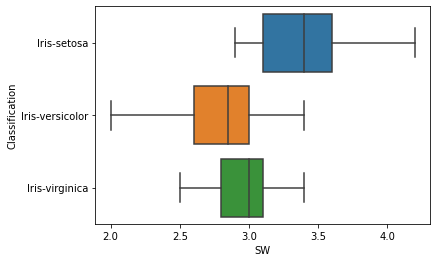

In [16]:
sns.boxplot(data=data,y="Classification",x="SW")
plt.show()

# 3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [17]:
x=data.drop("Classification",axis=1)
y=data["Classification"]

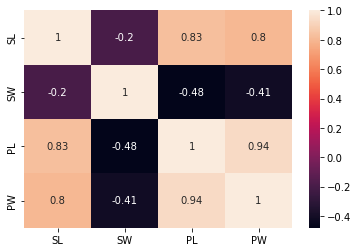

In [18]:
ax = sns.heatmap(x.corr(), annot=True)

# Splitting data for model

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=24)

# K-Nearest Neighbour Algorithm

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=5)

knnClassifier.fit(x_train, y_train)

y_pred = knnClassifier.predict(x_test)
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9666666666666667


# Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

y_pred = clf_gini.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier() 
 
RFclf.fit(x_train, y_train)
 
y_pred = RFclf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


# SVM Model

In [27]:
from sklearn.svm import SVC
supp_vec = SVC(kernel='linear')
model_2 = supp_vec.fit(x_train, y_train)
svm_predictions = model_2.predict(x_test)
print("The accuracy score of SVM model is: ",accuracy_score(svm_predictions, y_test))

The accuracy score of SVM model is:  1.0


From the above models we can see that Random Forest and Decision Tree and SVM models have high accuracy

# Feature Importance

In [23]:
pd.Series(RFclf.feature_importances_, index=x.columns).sort_values(ascending=False)

PW    0.497700
PL    0.378218
SL    0.096987
SW    0.027095
dtype: float64

We can see petal width is the most important factor deciding type of iris
 